# Numerical Methods

## Numerical Differentiation

### Some additional exercises - Solutions

## <span style="color:blue">Exercise: Write Taylor expansions</span>

Write the Taylor series expansion of the following functions to the order 5:
 - $f(x) = e^x$ at $x_0 = 0$
 - $f(x) = \frac{1}{1-x}$ at $x_0 = 0$
 - $f(x) = \sin(x)$ at $x_0 = \pi$

Let's recall the lecture: 
\begin{align*}
f(x_0+h)&=f(x_0)+hf'(x_0)+ \frac{h^2}{2!}f''(x_0) + \frac{h^3}{3!}f'''(x_0) + \ldots\\ & =f(x_0)+hf'(x_0)+O(h^2)
\end{align*}

thus, noting $h=x-x_0$ we have:  

For $f(x) = e^x$ at $x_0 = 0$  
$f'(x) = \exp(x)$ and $f'(0) = 1$
$$
\exp(x) = \exp(0) + x \exp(0) + x^2/2! \exp(0) + x^3/3! \exp(0) + x^4/4! \exp(0) + x^5/5! \exp(0) + O(x^6) \\
       = 1 + x + x^2/2 + x^3/6 + x^4/24 + x^5/120 + O(x^6)
$$

For $f(x) = \frac{1}{1-x}$ at $x_0 = 0$  
$f'(x) = 1/(1-x)^2$ and $f'(0) = 1$ 
$$
f(x) = 1 + x + x^2 + x^3 + x^4 + x^5 + O(x^6)
$$

For $f(x) = \cos(x)$ at $x_0 = \pi$  
$f'(x) = -\sin(x)$ ...  
$$
\sin(x) = -1 + (x-\pi)^2/2  - (x-\pi)^4/24  + O((x-\pi)^6)
$$

## <span style="color:blue">Exercise: Derive a finite difference scheme for $f'''$</span>

The third derivative of function $f$ is $f'''(x) = f^{(3)}(x) = \frac{\mathrm{d}^3 f}{\mathrm{d}x^3}$.

Notice that $f'''(x) = g'(x)$ where $g(x)=f''(x)$. Use this observation to write a finite difference approximation of $f'''$ in $x_0$. Use central differencing for both first and second derivative approximations.

$$g'(x_0) \approx \frac{g(x_0+h)-g(x_0-h)}{2h}$$
hence
$$f'''(x_0) \approx \frac{f''(x_0+h)-f''(x_0-h)}{2h}$$
$$ f'''(x_0) \approx \frac{\frac{f(x_0+2h)-2f(x_0+h)+f(x_0)}{h^2} - \frac{f(x_0)-2f(x_0-h)+f(x_0-2h)}{h^2}}{2h} $$
and finally
$$ f'''(x_0) \approx \frac{\frac{1}{2}f(x_0+2h) - f(x_0+h) + f(x_0-h) + \frac{1}{2}f(x_0-2h)}{h^3} $$

Note that we could have used $h/2$ instead of $h$ in our finite difference schemes, but we generally do not want terms with $h/2$ (or any fraction of h) in the final result.

## <span style="color:blue">Exercise: Accuracy of forward Euler and Heun's methods</span>

Consider equation 
$$u'(t)=u(t),\quad u(0)=1\,.$$

Use the functions from Exercises 2.5 and 2.6 to plot the forward Euler and Heun's approximate solutions of this equation for different values of $\Delta t$.

Determine visually when both methods start to produce similar result.

Write a function *approx_error(f, u0, t0, t, dt)* that returns the approximation error at a given time $t$ for both methods.

Using a while loop, compute the error at $t=3$ for $\Delta t$ from $1$ to $10^{-6}$, and plot it against $\Delta t$ in logarithmic scale.

When does the difference between both approximate solutions at time $t=3$ start to be smaller than $10^{-3}$.

The difference of the errors with Euler forward and Heun's methods is smaller than 1e-3 for h=0.000031
The difference of the errors with Euler forward and Heun's methods is smaller than 1e-3 for h=0.000015
The difference of the errors with Euler forward and Heun's methods is smaller than 1e-3 for h=0.000008
The difference of the errors with Euler forward and Heun's methods is smaller than 1e-3 for h=0.000004
The difference of the errors with Euler forward and Heun's methods is smaller than 1e-3 for h=0.000002


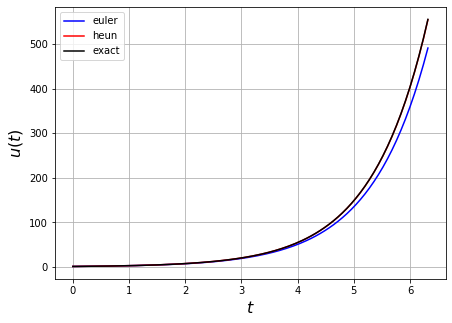

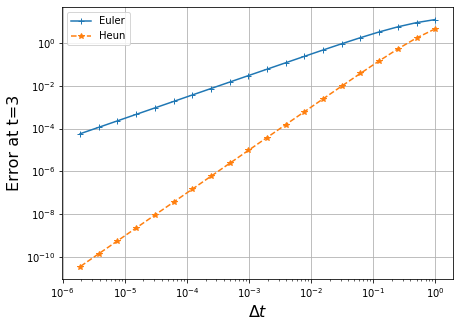

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def euler(f,u0,t0,t_max,dt):
    u=u0; t=t0; u_all=[u0]; t_all=[t0];
    while t<t_max:
        u = u + dt*f(u,t)
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return(u_all,t_all)

def heun(f,u0,t0,t_max,dt):
    u=u0; t=t0; u_all=[u0]; t_all=[t0];
    while t<t_max:
        ue = u + dt*f(u,t) # euler guess
        u = u + 0.5*dt*(f(u,t) + f(ue,t+dt))
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return(u_all,t_all)

def f(u,t):
    val = u
    return val

dt = 0.04
u0 = 1.0
t0 = 0.0
tf = 2*np.pi

# set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(111)

(u_all,t_all) = euler(f,u0,t0,tf,dt)
ax1.plot(t_all, u_all,'b',label='euler')

(u_all,t_all) = heun(f,u0,t0,tf,dt)
ax1.plot(t_all, u_all,'r',label='heun')

# exact solution
ax1.plot(t_all, np.exp(t_all),'k',label='exact')

ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$u(t)$', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best')

def approx_error(dt, t_max):
    uall, tall =   euler(f,u0,t0,t_max,dt)
    error_euler = abs(uall[-1]-np.exp(t_max))
    uall, tall =   heun(f,u0,t0,t_max,dt)
    error_heun = abs(uall[-1]-np.exp(t_max))
    return error_euler, error_heun

erre = []
errh = []
dt_array = []
dt = 1
while dt > 0.000001:
    dt_array.append(dt)
    err1, err2 = approx_error(dt, 3)
    erre.append(err1)
    errh.append(err2)
    if abs(err1 - err2) < 0.001: 
        print("The difference of the errors with Euler forward and Heun's methods is smaller than 1e-3 for h=%f" % dt)
    dt  *= 0.5

# set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(111)

ax1.loglog(dt_array, erre, '+-', label = 'Euler')
ax1.loglog(dt_array, errh, '*--', label = 'Heun')

ax1.set_xlabel('$\Delta t$', fontsize=16)
ax1.set_ylabel('Error at t=3', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best')

